In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

%matplotlib inline

# 1 Regresión Lineal Ordinaria (LSS)

Se comenzará el informe con la contrucción de un modelo para precedir el precio de una casa. Como datos de entrada se usará un *dataset* con las ventas en el condado de King County, EEUU entre Mayo de 2014 y Mayo de 2015. Para esto, se utilizará una regresión lineal ordinaria basada en LSS (Linear Least Squares)

## a) Ingreso de los datos

Los datos fueron obtenidos de Kaggle, y se encuentran en un archivo CSV. Las características o *features* id (número identificador), date (fecha) y zipcode (código postal) serán descartadas ya que de ante mano podemos suponer que no tienen relación con el precio de la casa.

In [2]:
df = pd.read_csv("kc_house_data.csv", sep = ",", header = 0)
df = df.drop(['id','date','zipcode'], axis=1)

## b) Análisis Descriptivo de los Datos

Primero es útil revisar el tamaño del dataset, junto con todo el resto de las características.

In [3]:
df.shape

(21613, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


In [7]:
pd.DataFrame.corr(df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


In [39]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## c) Transformación de las Variables

Los modelos de regresión lineal múltiple asumen ciertas cosas sobre el *dataset*:

* Las variables dependientes e independientes tienen una relación lineal
* Las variables siguen una distribución normal

Una función entregada por SciKit que nos puede ayudar para el segundo punto es StandardScaler, el cual hace lo que se llama Estandarización o Z-score normalization. Esto es, transformar las variables en sus z-scores a partir de:

$$x - \mu \over \sigma$$

Siendo $\mu$ el promedio de la población y $\sigma$ la desviación estándar de ésta. Esto va a permitir que los datos tengan una media o esperanza centrada en 0, y varianzas bajo el mismo orden de magnitud.

Para el caso de nuestra variable dependiente **precio**, se va a hacer además una transformación logarítmica. Ésta es una práctica común al trabajar con variables referidas a dinero, y tiene varias ventajas:

* Los precios en general tienen *skewness*, o sea, su histograma está desbalanceado, con la mayor parte de los datos acumulados en cierto rango de valores. Una transformacion logarítmica puede ayudar a balancear el histograma (mejorar la simetría), y hacer que su comportamiento sea similar a una distribución normal.
* Los cambios en el valor logarítmico de una variable pueden ser directamente interpretados como cambios porcentuales.
* El logaritmo puede convertir relaciones multiplicativas en relaciones aditivas (como en el caso anterior, donde los cambios son convertidos en adiciones), y por tanto, hace que patrones de crecimiento exponencial se conviertan en patrones lineales, los cuales funcionan mucho mejor con nuestro modelo.

http://www.jerrydallal.com/lhsp/logs.htm
https://www.r-statistics.com/2013/05/log-transformations-for-skewed-and-wide-distributions-from-practical-data-science-with-r/
https://people.duke.edu/~rnau/411log.htm


In [40]:
#Se guarda en la variable X todo el dataset
X = df
#Transformacion Logaritmica
y = np.log(df['price'])

# Se crea un vector "mascara" del largo del dataframe X, 
# y se elige un limite del 70% del dataset para ser usado como conjunto de entrenamiento
# El otro 30% sera un conjunto de prueba
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = (mask== 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

# Se quita la columna de precio de X despues de la normalización, ya que esto estara en el vector Y
Xtrain = Xtrain.drop(['price'], axis=1)
Xtest = Xtest.drop(['price'], axis=1)


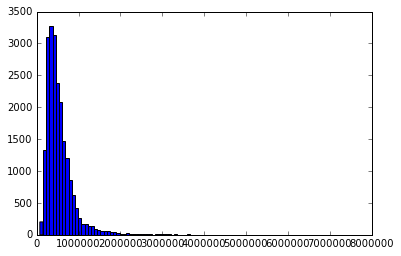

In [41]:
plt.hist(df['price'], bins=100)
plt.show()

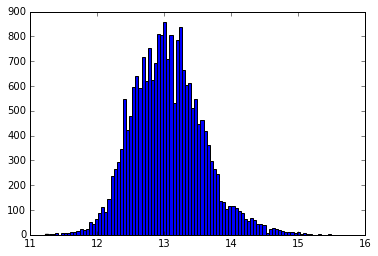

In [42]:
plt.hist(df_scaled_price, bins=100)
plt.show()

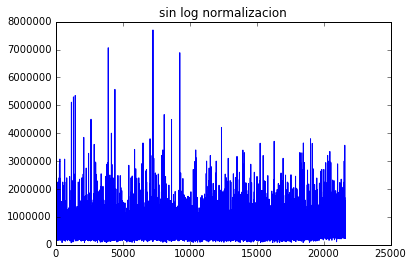

In [43]:
#plt.plot(np.arange(1,200), df_scaled['price'][0:199])
plt.plot(np.arange(1,21614), df['price'])
plt.title('sin log normalizacion')
plt.show()

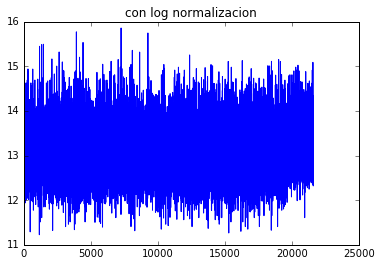

In [44]:
# ESTO ES EXPERIMENTACION, BORRAR DE AHI. TODO.

df_scaled_price = np.log(df['price'])

#plt.plot(np.arange(1,200), df_scaled['price'][0:199])
plt.plot(np.arange(1,21614), df_scaled_price)
plt.title('con log normalizacion')
plt.show()


Como vemos, logramos hacer que la media de las variables independientes sea muy cercana a cero, y que logre seguir distribuciones parecidas a una Gaussiana. Para el caso de la variable de precio, obtuvimos una escala distinta, pero también de tipo gaussiana.

## d) Contrucción del Modelo

A continuación se hará la regresión lineal. Recordando que la regresión lineal múltiple se puede ver como la resolución de un sistema de ecuaciones, donde cada elemento del conjunto de respuestas se puede ver como:

$$y_i = \beta_0 1 + \beta_1 x_{i1} + \cdots + \beta_q x_{iq} + \varepsilon_i$$

Sea $n$ el tamaño de la muestra (aquí, 21613) y $q$ el número de parámetros (aquí, 18). La ecuación de regresión lineal múltiple es:

$$ \large Y_{n \times 1} = X_{n \times q} \, \beta_{q \times 1} \, + \, \epsilon_{n \times 1}$$

$$
\begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n} \end{bmatrix} = \begin{bmatrix} 1 & x_{11} & x_{12} & \dots & x_{1p} \\ 1 & x_{21} & x_{22} & \dots & x_{2p} \\ \vdots & \vdots & \vdots & & \vdots \\ 1 & x_{n1} & x_{n2} & \dots & x_{np} \end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix} + \begin{bmatrix} \varepsilon_1\\ \varepsilon_2\\ \vdots\\ \varepsilon_n \end{bmatrix}
$$

Donde
* $Y$ es un vector de tamaño $n\times 1$, se le dice *vector de respuesta*
* $\epsilon$ es un vector de tamaño $n\times 1$, se le dice *vector de errores*
* $X$ es una matriz de tamaño $n\times q$, se le dice *matriz de diseño*
* $\beta$ es un vector de tamaño $q\times 1$, se le dice *vector de pendiente*

Ya que el elemento $\beta_0$ va multiplicado por uno, la matriz va a requerir una columna de unos.


http://dept.stat.lsa.umich.edu/~kshedden/Courses/Stat401/Notes/401-multreg.pdf

A la función LinearRegression le enviamos el parámetro **fit_intercept = False** debido a que los datos de precios ya están centrados

In [45]:
#Estandarizacion del dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrain)
df_scaled_train = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)

# Se ingresa columna de unos, que son los pesos o coeficientes del primer parametro (el intercepto, beta_0)
df_scaled_train.insert(df_scaled_train.shape[1], 'intercept', np.ones(df_scaled_train.shape[0]))
#df_scaled_train.info()
df_scaled_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
count,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,15129.0
mean,1.849785e-16,-3.789538e-17,4.719310e-17,3.861270e-17,-2.707568e-16,-7.205681e-16,4.689957e-16,3.856464e-16,1.383636e-15,-2.399649e-17,-1.015044e-16,5.131727e-16,-6.317132e-16,-1.266723e-14,2.541438e-14,-1.561753e-16,4.018495e-17,1.0
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,0.0
min,-3.695522e+00,-2.714893e+00,-1.844550e+00,-3.578749e-01,-8.478007e-01,-8.674852e-02,-3.101098e-01,-3.675091e+00,-3.940270e+00,-1.695150e+00,-6.746338e-01,-2.400159e+00,-2.174314e-01,-2.890957e+00,-2.184469e+00,-2.338019e+00,-4.573661e-01,1.0
25%,-3.963096e-01,-7.372207e-01,-7.074380e-01,-2.446882e-01,-8.478007e-01,-8.674852e-02,-3.101098e-01,-6.733930e-01,-5.071207e-01,-7.031746e-01,-6.746338e-01,-6.147711e-01,-2.174314e-01,-6.799023e-01,-8.048581e-01,-7.175202e-01,-2.870689e-01,1.0
50%,-3.963096e-01,-7.799663e-02,-1.775219e-01,-1.868669e-01,-8.478007e-01,-8.674852e-02,-3.101098e-01,-6.733930e-01,-5.071207e-01,-2.691856e-01,-6.746338e-01,6.367636e-02,-2.174314e-01,9.432470e-02,-1.150526e-01,-2.125067e-01,-2.007706e-01,1.0
75%,7.034278e-01,5.812274e-01,4.959132e-01,-1.122745e-01,1.113119e+00,-8.674852e-02,-3.101098e-01,8.274559e-01,3.511665e-01,4.747956e-01,6.581544e-01,8.135394e-01,-2.174314e-01,8.506629e-01,6.322367e-01,5.301602e-01,-1.110232e-01,1.0
max,8.401590e+00,7.832692e+00,1.268398e+01,3.825488e+01,4.054499e+00,1.152757e+01,4.846968e+00,2.328305e+00,4.642603e+00,9.501768e+00,1.003210e+01,1.706233e+00,4.645406e+00,1.557628e+00,6.466842e+00,6.144722e+00,3.081912e+01,1.0


In [46]:
#Se hace la regresion lineal multiple usando los datos de entrenamiento
linreg = lm.LinearRegression(fit_intercept = True)
linreg.fit(Xtrain, ytrain)
#Coeficientes obtenidos con la regresion sobre los datos de entrenamiento
print('Coeficientes: \n', linreg.coef_)
print(linreg.score(Xtest,ytest))

linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
#Coeficientes obtenidos con la regresion sobre los datos de entrenamiento
print('Coeficientes: \n', linreg.coef_)
print(linreg.score(Xtest,ytest))

Coeficientes: 
 [ -8.89195792e-03   7.26612802e-02   8.47805560e-05   5.35000538e-07
   6.96226731e-02   3.87519960e-01   5.49164475e-02   6.95786229e-02
   1.58420469e-01   3.50351582e-05   4.97453983e-05  -3.74072202e-03
   3.68415078e-05   1.34437531e+00  -2.89663275e-02   1.25380436e-04
  -2.56839991e-07]
0.763234217692
Coeficientes: 
 [ -1.10699465e-02   7.84096936e-02   8.46690030e-05   4.45837184e-07
   8.37030642e-02   3.92769856e-01   5.84066852e-02   6.19615945e-02
   1.70848587e-01   2.17307563e-05   6.29382464e-05  -4.82734553e-03
   2.67878912e-05   1.24601582e+00   3.18704627e-01   1.08689574e-04
  -4.72201258e-07]
0.750553472119


In [47]:
# Se obtiene R^2 para verificar la precision de la prediccion 
linreg.score(Xtest,ytest)
#linreg.score(Xtrain,ytrain)

0.75055347211851919

## e) Análisis de variables: Pesos y Z-score

In [48]:
import scipy as sc
from scipy import stats
import sklearn
from numpy import linalg
#from tabulate import tabulate

Tenemos que los pesos asignados a cada variable serán los coeficientes $\hat{\beta}$ estimados en los puntos anteriores mediante el método de minimos cuadrados. Por otro lado tenemos que los Z-Score se obtienen siguien $\displaystyle z_i = \frac{\hat{\beta_i}}{\sigma_i\sqrt{v_i}}$, donde $v_i$ es el elemento $i$-esimo de la diagonal de la matriz $(X^tX)^{-1}$

In [51]:
#Se carga el dataframe de los datos de entrenamiento en una arreglo para poder trabajar con estos

#X = np.array(df_scaled_train)
X = df_scaled_train.as_matrix()
#Se guarda la traspuesta de la matriz 
Xt = np.transpose(X)
#se computa el producto matricial entre la Xt y X 
XtX = np.dot(Xt,X)
# Se calcula la inversa de XtX
V = np.linalg.inv(XtX)
# Se guarda la diagonal de la matriz
Vdiag = np.diag(V)
#Se obtienen los coeficientes
betas = linreg.coef_
#se obtiene la desviacion estandar para cada variable
sigma = df_scaled_train.std()
#Se calculan los z-score
#Zscore = betas/(sigma*np.sqrt(Vdiag))

Vdiag

array([  1.07502354e-04,  -1.62438231e-04,  -6.23451644e+26,
         1.37104072e-04,  -6.98031758e-05,   7.88001056e-05,
         9.24557761e-05,   7.83259037e-05,   2.28270759e-04,
        -4.94211797e+26,  -1.53997899e+26,   1.42343243e-04,
         7.50725049e-05,   7.34614546e-05,   9.92949102e-05,
         4.91391884e-05,   1.42328850e-04,   5.65091468e-05])

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
#z_scores  = sc.stats.zscore(X, axis=1, ddof=1)
#print(z_scores)
#linreg.coef_
#mean_squared_error(ytest, ytest_pred)
#ytest-ytest_pred
#linreg.residues_
#ytest_pred = linreg.predict(Xtest)

#print(np.abs(ytest - ytest_pred))
#print(r2_score(ytest, ytest_pred))

sklearn.feature_selection.f_regression(Xtrain,ytrain)

(array([  2026.48669376,   6339.03956141,  13641.7571862 ,    175.60554059,
          1842.56393195,    515.9857159 ,   2089.62069784,     45.50694334,
         14169.55099199,   8322.60332878,   1705.38368579,     42.13665573,
           241.89630086,   3950.10616271,     24.60793443,  10001.98131949,
           141.82082213]),
 array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          7.36391242e-040,   0.00000000e+000,   2.37548172e-112,
          0.00000000e+000,   1.57617925e-011,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   8.77632325e-011,
          3.98317113e-054,   0.00000000e+000,   7.10245831e-007,
          0.00000000e+000,   1.48780098e-032]))

In [17]:
linreg.singular_

array([  2.75720300e+02,   1.76774586e+02,   1.65442825e+02,
         1.40690535e+02,   1.31190278e+02,   1.23085549e+02,
         1.22111950e+02,   1.15332183e+02,   1.05478108e+02,
         9.92811085e+01,   8.97122785e+01,   8.75209835e+01,
         7.07276320e+01,   6.63680334e+01,   6.00492336e+01,
         5.74327083e+01,   5.34604681e+01,   3.66599579e-14])

In [18]:
#w_z = pd.DataFrame([linreg.coef_,])
#w_z.describe

#import sklearn.metrics as metrics
#metrics.classification_report()

linreg.intercept_

0.0

MSE: Mean Squared Error

In [52]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))

from sklearn.model_selection import KFold

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
kf_5 = KFold(n_splits=5)
kf_10 = KFold(n_splits=10)
mse_cv = 0

for train, val in kf_5.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 5
print(mse_cv)

mse_cv = 0

for train, val in kf_10.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 10
print(mse_cv)

0.0664448643685
0.0664420515973


In [ ]:
mse_cv


## j) Análisis del error y normalidad de los datos

## k)

In [ ]:
df_A = df_scaled.sample(3000)
frames = []
valor = df_scaled.price
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,0.5):
    frames.append(df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+0.5)].head(500))
df_B = pd.concat(frames).sample(3000)
X_A = df_A.iloc[:,1:].values
y_A = np.log(df_A.price)
X_B = df_B.iloc[:,1:].values
y_B = np.log(df_B.price)
from sklearn.model_selection import train_test_split
Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

linregA = lm.LinearRegression(fit_intercept = True)
linregA.fit(Xtrain_A, ytrain_A)
print('Coeficientes: \n', linregA.coef_)
print(linregA.score(Xval_A,yval_A))

linregB = lm.LinearRegression(fit_intercept = True)
linregB.fit(Xtrain_B, ytrain_B)
print('Coeficientes: \n', linregB.coef_)
print(linregB.score(Xval_B,yval_B))

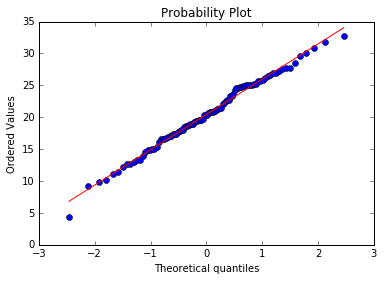

In [55]:
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=plt)
plt.show()

# 4. Peliculas

Tenemos 145256 características, debido a todas las combinaciones de palabras posibles de las críticas/reviews de cada película.

Son 1147 elementos de entrenamiento, 254 elementos de prueba, y 317 elementos para el cross-validation.


In [47]:
import pandas as pd
import numpy as np
from scipy.sparse import csc_matrix
from scipy.io import mmread
#X_movies = pd.SparseDataFrame( csr_matrix(mmread('train.x.mm')) )
X_movies = csc_matrix(mmread('train.x.mm'))
y_movies = np.loadtxt('train.y.dat')
X_movies_test = csc_matrix(mmread('test.x.mm'))
y_movies_test = np.loadtxt('test.y.dat')

In [48]:
print(X_movies.shape)
print(y_movies.shape)

(1147, 145256)
(1147,)


In [49]:
import sklearn.linear_model as lm
model = lm.LinearRegression(fit_intercept = False)
model.fit(X_movies, y_movies)
print("Usando regresión lineal ordinaria, sin preprocesamiento, R^2 es: ", model.score(X_movies_test, y_movies_test))

Usando regresión lineal ordinaria, sin preprocesamiento, R^2 es:  0.590314359229


Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.

MaxAbsScaler and maxabs_scale were specifically designed for scaling sparse data, and are the recommended way to go about this. However, scale and StandardScaler can accept scipy.sparse matrices as input, as long as with_mean=False is explicitly passed to the constructor. Otherwise a ValueError will be raised as silently centering would break the sparsity and would often crash the execution by allocating excessive amounts of memory unintentionally. RobustScaler cannot be fitted to sparse inputs, but you can use the transform method on sparse inputs.

Note that the scalers accept both Compressed Sparse Rows and Compressed Sparse Columns format (see scipy.sparse.csr_matrix and scipy.sparse.csc_matrix). Any other sparse input will be converted to the Compressed Sparse Rows representation. To avoid unnecessary memory copies, it is recommended to choose the CSR or CSC representation upstream.

Finally, if the centered data is expected to be small enough, explicitly converting the input to an array using the toarray method of sparse matrices is another option.

In [59]:
#Estandarizacion del dataset
from sklearn.preprocessing import MaxAbsScaler
scaler_movies = MaxAbsScaler().fit(X_movies) # Para matriz sparse
#X_scaled_movies_train = pd.DataFrame(scaler_movies.transform(X_movies), columns=X_movies.columns)
X_scaled_movies_train = scaler_movies.transform(X_movies)

# Se ingresa columna de unos, que son los pesos o coeficientes del primer parametro (el intercepto, beta_0)
#X_scaled_movies_train.insert(X_scaled_movies_train.shape[1], 'intercept', np.ones(X_scaled_movies_train.shape[0]))
from scipy.sparse import hstack
matriz_de_unos = csc_matrix(np.ones(X_scaled_movies_train.shape[0])[:, None])
print(matriz_de_unos.shape)
print(X_scaled_movies_train.shape)
X_scaled_movies_train = hstack((X_scaled_movies_train, matriz_de_unos))
print(X_scaled_movies_train.shape)

#df_scaled_train.info()
#X_scaled_movies_train.describe()


model_movies = lm.LinearRegression(fit_intercept = False)
model_movies.fit(X_scaled_movies_train, y_movies)


scaler_movies_test = MaxAbsScaler().fit(X_movies_test) # Para matriz sparse
X_scaled_movies_test = scaler_movies_test.transform(X_movies_test)
matriz_de_unos = csc_matrix(np.ones(X_scaled_movies_test.shape[0])[:, None])
X_scaled_movies_test = hstack((X_scaled_movies_test, matriz_de_unos))
print(model.score(X_scaled_movies_test, y_movies_test))

(1147, 1)
(1147, 145256)
(1147, 145257)
0.443035351294


In [98]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(model_movies, threshold=3.0)
selector.fit(X_scaled_movies_train, y_movies)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False),
        norm_order=1, prefit=False, threshold=3.0)

In [66]:
selector.support_

AttributeError: 'SelectFromModel' object has no attribute 'support_'

In [99]:
n_features = selector.transform(X_scaled_movies_train)

In [100]:
n_features

<1147x145245 sparse matrix of type '<class 'numpy.float64'>'
	with 2764829 stored elements in Compressed Sparse Row format>

In [101]:
X_scaled_movies_train

<1147x145257 sparse matrix of type '<class 'numpy.float64'>'
	with 2765257 stored elements in Compressed Sparse Column format>

In [102]:
model_movies = lm.LinearRegression(fit_intercept = False)
model_movies.fit(X_scaled_movies_train, y_movies)


scaler_movies_test = MaxAbsScaler().fit(X_movies_test) # Para matriz sparse
X_scaled_movies_test = scaler_movies_test.transform(X_movies_test)
matriz_de_unos = csc_matrix(np.ones(X_scaled_movies_test.shape[0])[:, None])
X_scaled_movies_test = hstack((X_scaled_movies_test, matriz_de_unos))
print(model.score(X_scaled_movies_test, y_movies_test))

0.443035351294
